In [2]:
import requests
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.isnull().any()

Hours     False
Scores    False
dtype: bool

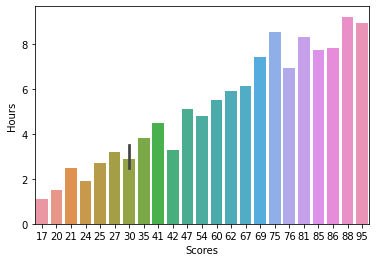

In [7]:
p = sns.barplot(x='Scores', y='Hours', data= data )

In [8]:
# reshaping the values and splitting the data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Applying Linear Regression Model

In [9]:
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
y1_pred = Lin_reg.predict(X_test)


In [10]:
# Comparing the predicted data with actual data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y1_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [11]:
mse = mean_squared_error(y_test, y1_pred)
mae = mean_absolute_error(y_test, y1_pred)
rmse = mean_squared_error(y_test, y1_pred)**0.5
r2 = r2_score(y_test, y1_pred)

print('MAE (Mean Absolute Error): %0.3f' %mae)
print('MSE (Mean Squared Error): %0.3f' %mse)
print('RMSE (Root mean squared error): %0.3f' %rmse)
print('R2 score: %0.3f' %r2)

MAE (Mean Absolute Error): 4.420
MSE (Mean Squared Error): 22.965
RMSE (Root mean squared error): 4.792
R2 score: 0.957


In [16]:
# calculating the score for 9.25 hrs
hours = 9.25
self_pred = Lin_reg.predict([[9.25]])
print("Hours = {}".format(hours))
print("Scores = {}".format(self_pred[[0]]))

Hours = 9.25
Scores = [92.91505723]
